In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# Height Classifier

In [3]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Districts_5Day/Bangalore.csv")
test_df = pd.read_csv("Karnataka_Districts_5Day/Bangalore_Rural.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_rural_5Day.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_rural_5Day.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_18308\2603007725.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_18308\2603007725.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.5275

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.73      0.68      2111
           2       0.28      0.29      0.29       822
           3       0.39      0.22      0.28       745

    accuracy                           0.53      3678
   macro avg       0.44      0.41      0.42      3678
weighted avg       0.51      0.53      0.51      3678


🔹 Confusion Matrix:
 [[1535  435  141]
 [ 468  242  112]
 [ 398  184  163]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [4]:


# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield/predictions_height.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Agrifield/height_comparison.csv", index=False)

# Print the result
print(result)


Predicted_height  Crop_Name  Height     1    2   3
0                    Bersem   Short     7    9   0
1                 Coriander   Short    10    2   1
2                    Garlic   Short    27   22   0
3                      Gram   Short    46   11   0
4                 Green pea   Short    16   16   0
5                    Lentil   Short    74   36   0
6                     Maize  Medium   156   83  18
7                   Mustard   Short   576  329  24
8                    Potato   Short    17   18   5
9                      Rice   Short    53   42   2
10                Sugarcane    Tall    75   77  12
11                    Wheat   Short  1235  538  34


# Duration Classifier

In [5]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Districts_5Day/Bangalore.csv")
test_df = pd.read_csv("Karnataka_Districts_5Day/Bangalore_Rural.csv")


# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns + NDVI_columns

# Define target variable
target_column = "duration_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_rural_5Day_duration.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_rural_5Day_duration.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_18308\365361934.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_18308\365361934.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.4981

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.93      0.64      1651
           2       0.52      0.08      0.14       901
           3       0.58      0.19      0.29      1126

    accuracy                           0.50      3678
   macro avg       0.53      0.40      0.36      3678
weighted avg       0.52      0.50      0.41      3678


🔹 Confusion Matrix:
 [[1543   26   82]
 [ 753   71   77]
 [ 869   39  218]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [6]:


# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield/predictions_duration.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Agrifield/duration_comparison.csv", index=False)

# Print the result
print(result)


Predicted_duration  Crop_Name Duration     1    2    3
0                      Bersem   Medium    12    1    3
1                   Coriander      Low     8    3    2
2                      Garlic   Medium    29   19    1
3                        Gram      Low    46   11    0
4                   Green pea   Medium    20    7    5
5                      Lentil   Medium    90   12    8
6                       Maize   Medium   151   78   28
7                     Mustard      Low   703  158   68
8                      Potato   Medium    22    9    9
9                        Rice   Medium    70   21    6
10                  Sugarcane     Long   100   21   43
11                      Wheat      Low  1463  232  112


C:\Users\prath\AppData\Local\Temp\ipykernel_9208\3145665821.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = grouped.groupby(['Predicted_height', 'Predicted_duration'])['Crop_Info'].apply(lambda x: wrap_text(x.tolist(), max_chars=40)).reset_index()


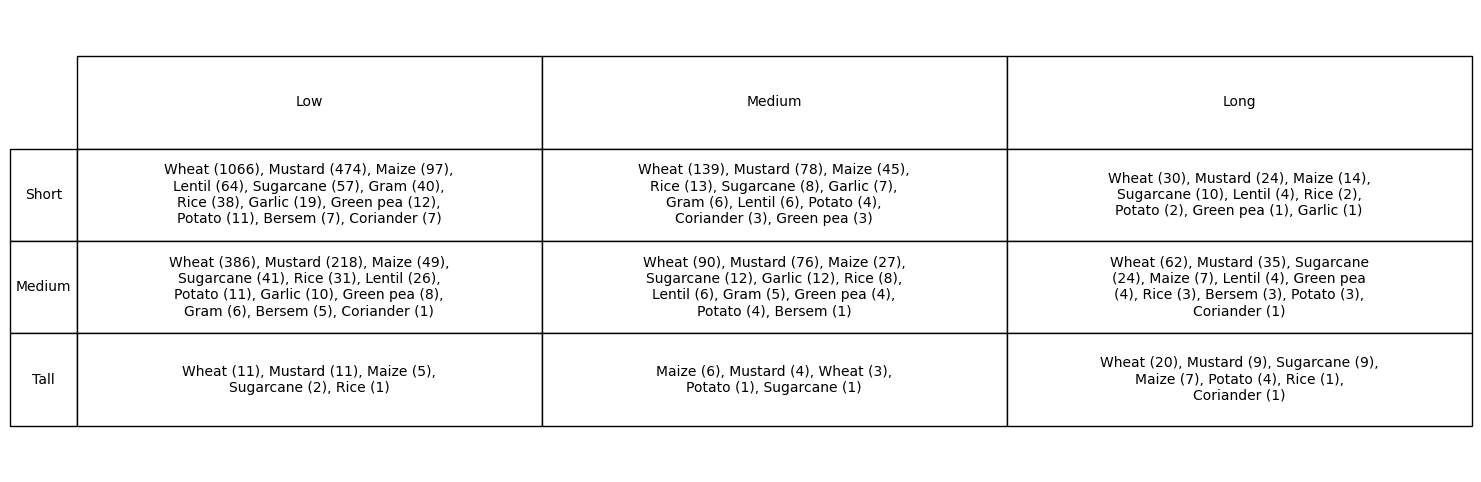

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield/predictions_duration.csv")

# Mapping numerical labels to readable names
height_map = {1: "Short", 2: "Medium", 3: "Tall"}
duration_map = {1: "Low", 2: "Medium", 3: "Long"}

# Count occurrences of each crop in categories
grouped = df.groupby(['Predicted_height', 'Predicted_duration'])['Crop_Name'].value_counts().reset_index(name='Count')

# Apply label mappings
grouped['Predicted_height'] = grouped['Predicted_height'].map(height_map)
grouped['Predicted_duration'] = grouped['Predicted_duration'].map(duration_map)

# Define the correct sorting order
height_order = ["Short", "Medium", "Tall"]
duration_order = ["Low", "Medium", "Long"]

# Convert to categorical for proper sorting
grouped['Predicted_height'] = pd.Categorical(grouped['Predicted_height'], categories=height_order, ordered=True)
grouped['Predicted_duration'] = pd.Categorical(grouped['Predicted_duration'], categories=duration_order, ordered=True)

# Format crops as "Wheat (12), Maize (7)" to fit more per line
grouped['Crop_Info'] = grouped.apply(lambda row: f"{row['Crop_Name']} ({row['Count']})", axis=1)

# Merge multiple crops per category into a single string
def wrap_text(crop_list, max_chars=40):
    """Join crops efficiently & wrap only when necessary."""
    text = ", ".join(crop_list)  # Join all crops first
    return "\n".join(textwrap.wrap(text, width=max_chars))  # Wrap if exceeding width

final_df = grouped.groupby(['Predicted_height', 'Predicted_duration'])['Crop_Info'].apply(lambda x: wrap_text(x.tolist(), max_chars=40)).reset_index()

# Sort before pivoting
final_df = final_df.sort_values(by=['Predicted_height', 'Predicted_duration'])

# Pivot table for better visualization
pivot_df = final_df.pivot(index='Predicted_height', columns='Predicted_duration', values='Crop_Info').fillna("")

# ---- Improved Table for PowerPoint ---- #
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust table size

ax.axis("tight")
ax.axis("off")

# Create table
table = ax.table(cellText=pivot_df.values,
                 colLabels=pivot_df.columns,
                 rowLabels=pivot_df.index,
                 cellLoc="center",
                 loc="center")

# Formatting: Adjust text fitting & avoid overlap
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

for key, cell in table.get_celld().items():
    cell.set_text_props(wrap=True, ha='center', va='center')
    cell.set_height(0.2)  # Adjust row height

# Save the final image
plt.savefig("Karnataka_Datasets/Agrifield/crop_predictions_table.png", dpi=300, bbox_inches="tight")

# Show the image
plt.show()
